In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cvxpy as cp

# temp is indepedent variable
data_folder = "hw6_data"
temp = np.loadtxt(os.path.join(data_folder, "maxtemp.txt"))

# demand is dependent variable
demand = np.loadtxt(os.path.join(data_folder, "maxdemand.txt"))

# q2 data 
q2_data = np.loadtxt(os.path.join(data_folder, "q2_data.txt"))

test_points = np.linspace(1, max(temp), 1000)

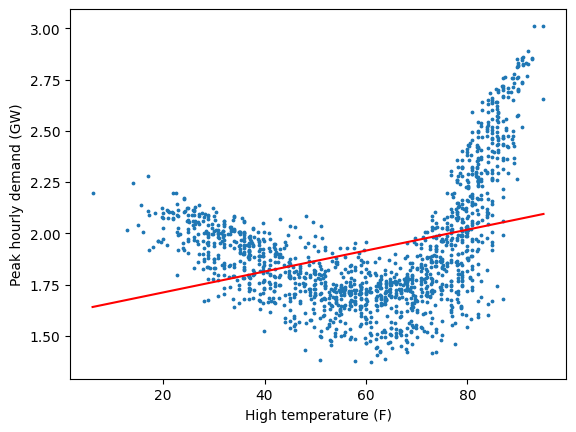

In [5]:
# simple linear regression 

# 1. calculate feature map
# here feature map is simply the 1 vector combined with data vector
# phi is the feature map;
k = len(temp)
phi = np.array([np.ones(k), temp]).T

# 2. calculate regression coefficients
# first index: y-intercept, second index: gradient
theta =  np.linalg.inv(phi.T @ phi) @ phi.T @ demand

# 3. calculate test points
predictions  = theta[0] + theta[1] * test_points

# 4. plot result 
plt.scatter(temp, demand, s=3)
plt.plot(test_points, predictions, color = 'red')
plt.xlabel("High temperature (F)")
plt.ylabel("Peak hourly demand (GW)")
plt.show()


[ 2.60561622e+00 -6.42244084e-02  2.98076862e-03 -7.22376907e-05
  7.53321815e-07 -2.54777899e-09]


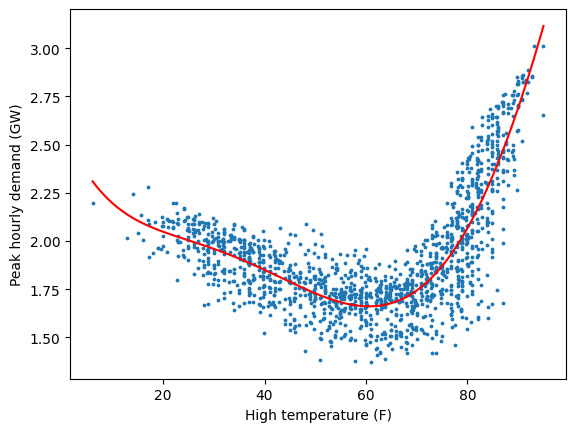

In [39]:
# non-linear regression d = 5
# 1. calculate feature map
# here feature map is simply the 1 vector combined with data vector
# phi is the feature map;
k = len(temp)
phi = np.array([np.ones(k), temp, temp**2, temp**3, temp**4, temp**5]).T

# 2. calculate regression coefficients
# first index: y-intercept, second index: gradient
theta =  np.array(np.linalg.inv(phi.T @ phi) @ phi.T @ demand)
print(theta)

# 3. calculate test points
k_test = len(test_points)
test_point_map = np.array([np.ones(k_test), test_points,test_points**2, test_points**3, test_points**4, test_points**5])
predictions_new  = theta @ test_point_map


# 4. plot result 
plt.scatter(temp, demand, s=3)
plt.plot(test_points, predictions_new, color = 'red')
plt.xlabel("High temperature (F)")
plt.ylabel("Peak hourly demand (GW)")
plt.show()

[ 2.15521697 -0.16005905  1.86460897 -0.83052833  2.99106664]


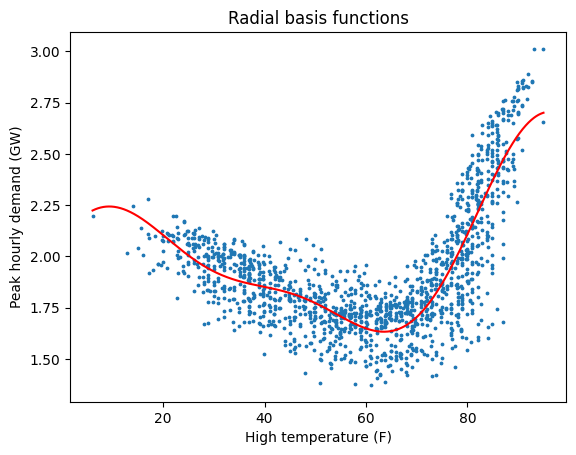

In [68]:
# radial basis functions
n = 5
mu_vec = np.linspace(min(temp), max(temp), n)

def rbf(x, mu, sigma):
    r = np.abs(x - mu)
    return np.exp(-(r ** 2)/ (2*sigma**2))

# 1. calculate feature map
# here feature map is simply the 1 vector combined with data vector
# phi is the feature map;
k = len(temp)
bandwidth = 20 
phi = np.array([
    rbf(temp, mu_vec[0], bandwidth),
    rbf(temp, mu_vec[1], bandwidth), 
    rbf(temp, mu_vec[2], bandwidth),
    rbf(temp, mu_vec[3], bandwidth),
    rbf(temp, mu_vec[4], bandwidth)
    ]).T

# 2. calculate regression coefficients
# first index: y-intercept, second index: gradient
theta =  np.array(np.linalg.inv(phi.T @ phi) @ phi.T @ demand)
print(theta)

# 3. calculate test points
k_test = len(test_points)
test_point_map = np.array([
    rbf(test_points, mu_vec[0], bandwidth),
    rbf(test_points, mu_vec[1], bandwidth), 
    rbf(test_points, mu_vec[2], bandwidth),
    rbf(test_points, mu_vec[3], bandwidth),
    rbf(test_points, mu_vec[4], bandwidth)
    ])
predictions_new  = theta @ test_point_map


# 4. plot result 
plt.scatter(temp, demand, s=3)
plt.plot(test_points, predictions_new, color = 'red')
plt.xlabel("High temperature (F)")
plt.ylabel("Peak hourly demand (GW)")
plt.title("Radial basis functions")
plt.show()

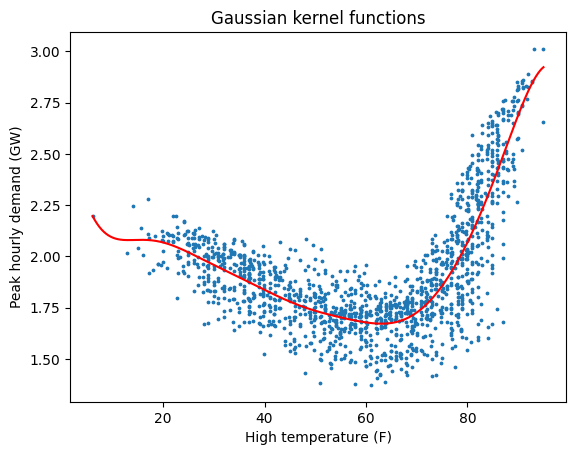

In [28]:
# gaussian kernel with regularisation
sigma = 20
def gaussian_kernel(x,y, sigma):
    r = np.abs(x - y)
    return np.exp(-(r ** 2)/ (2*sigma**2))

def guassian_kernel_matrix(x, y, sigma):
    kernel_matrix = np.zeros([len(x), len(y)])

    for i in range(len(x)):
        for j in range(len(y)):
            kernel_matrix[i,j] = gaussian_kernel(x[i], y[j], sigma)

    return kernel_matrix

# 1. calculate kernel
K = guassian_kernel_matrix(temp, temp, 20)

lambda_ = 0.00001
n = len(temp)
K_inv = np.linalg.inv(K + lambda_ * np.eye(n))


# 2. Compute the regression coefficients
alpha = K_inv @ demand



# 3. Prediction step
k_test = guassian_kernel_matrix(test_points, temp, sigma)
prediction_kerenl = k_test @ alpha


# 4. plot result 
plt.scatter(temp, demand, s=3)
plt.plot(test_points, prediction_kerenl, color = 'red')
plt.xlabel("High temperature (F)")
plt.ylabel("Peak hourly demand (GW)")
plt.title("Gaussian kernel functions")
plt.show()

[1.76280369e+00 1.59565962e-03]


/home/wde.woodside.com.au/w47147/projects/new_energy_data_utils/.venv/lib/python3.8/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


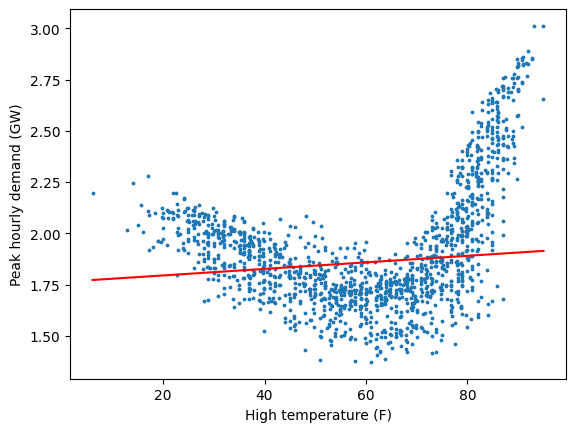

In [11]:
# question 1b
# linear regression 
# simple linear regression 

# 1. calculate feature map
# here feature map is simply the 1 vector combined with data vector
# phi is the feature map;
k = len(temp)
phi = np.array([np.ones(k), temp]).T

# 2. calculate regression coefficients
# first index: y-intercept, second index: gradient
# Setup the optimization variable
p = 2
theta = cp.Variable(p)

# Define the objective function (sum of absolute errors)
# objective = cp.Minimize(cp.norm(phi @ theta - demand, 1))
objective =  cp.Minimize(cp.sum(cp.abs(demand - phi @ theta)))
# Define the problem and solve it
problem = cp.Problem(objective)
problem.solve()
print(theta.value)

# 3. calculate test points
predictions  = theta.value[0] + theta.value[1] * test_points

# 4. plot result 
plt.scatter(temp, demand, s=3)
plt.plot(test_points, predictions, color = 'red')
plt.xlabel("High temperature (F)")
plt.ylabel("Peak hourly demand (GW)")
plt.show()

[ 2.28786398e+00 -1.94586679e-02  9.14358119e-04 -2.93522229e-05
  3.41579874e-07 -1.05651420e-09]


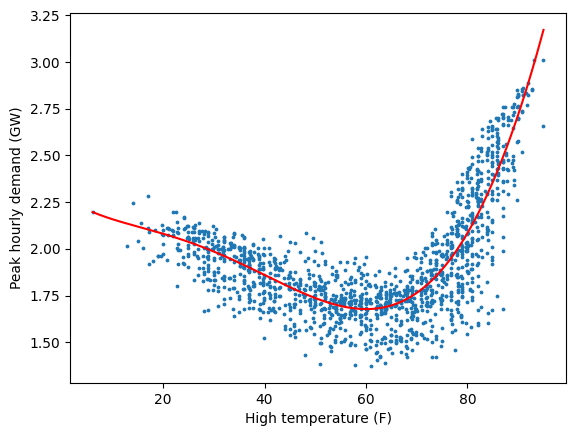

In [16]:
# non-linear regression d = 5
# 1. calculate feature map
# here feature map is simply the 1 vector combined with data vector
# phi is the feature map;
k = len(temp)
phi = np.array([np.ones(k), temp, temp**2, temp**3, temp**4, temp**5]).T

# 2. calculate regression coefficients
# first index: y-intercept, second index: gradient
# Setup the optimization variable
p = 6
theta = cp.Variable(p)

# Define the objective function (sum of absolute errors)
# objective = cp.Minimize(cp.norm(phi @ theta - demand, 1))
objective =  cp.Minimize(cp.sum(cp.abs(demand - phi @ theta)))
# Define the problem and solve it
problem = cp.Problem(objective)
problem.solve(max_iters=10000)
print(theta.value)

# 3. calculate test points
k_test = len(test_points)
test_point_map = np.array([np.ones(k_test), test_points,test_points**2, test_points**3, test_points**4, test_points**5])
predictions_new  = theta.value @ test_point_map


# 4. plot result 
plt.scatter(temp, demand, s=3)
plt.plot(test_points, predictions_new, color = 'red')
plt.xlabel("High temperature (F)")
plt.ylabel("Peak hourly demand (GW)")
plt.show()

[ 1.98071161  0.05216235  1.66979187 -0.63169862  2.86872888]


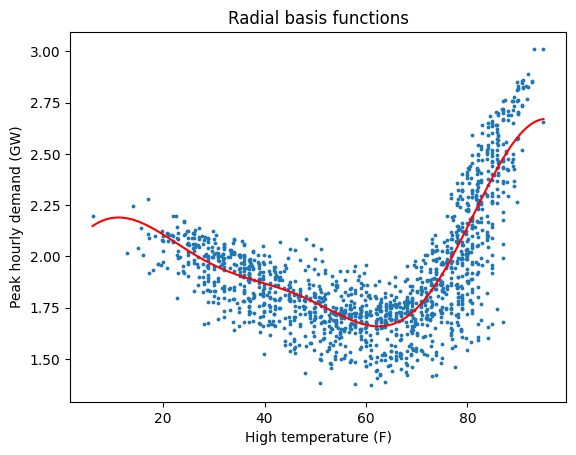

In [4]:
# radial basis functions
n = 5
mu_vec = np.linspace(min(temp), max(temp), n)

def rbf(x, mu, sigma):
    r = np.abs(x - mu)
    return np.exp(-(r ** 2)/ (2*sigma**2))

# 1. calculate feature map
# here feature map is simply the 1 vector combined with data vector
# phi is the feature map;
k = len(temp)
bandwidth = 20 
phi = np.array([
    rbf(temp, mu_vec[0], bandwidth),
    rbf(temp, mu_vec[1], bandwidth), 
    rbf(temp, mu_vec[2], bandwidth),
    rbf(temp, mu_vec[3], bandwidth),
    rbf(temp, mu_vec[4], bandwidth)
    ]).T

# 2. calculate regression coefficients
# first index: y-intercept, second index: gradient
p = 5
theta_cp = cp.Variable(5)

# Define the objective function (sum of absolute errors)
# objective = cp.Minimize(cp.norm(phi @ theta - demand, 1))
objective =  cp.Minimize(cp.sum(cp.abs(demand - phi @ theta_cp)))
# Define the problem and solve it
problem = cp.Problem(objective)
problem.solve(solver = "GUROBI")
print(theta_cp.value)

# 3. calculate test points
k_test = len(test_points)
test_point_map = np.array([
    rbf(test_points, mu_vec[0], bandwidth),
    rbf(test_points, mu_vec[1], bandwidth), 
    rbf(test_points, mu_vec[2], bandwidth),
    rbf(test_points, mu_vec[3], bandwidth),
    rbf(test_points, mu_vec[4], bandwidth)
    ])
predictions_new  = theta_cp.value @ test_point_map


# 4. plot result 
plt.scatter(temp, demand, s=3)
plt.plot(test_points, predictions_new, color = 'red')
plt.xlabel("High temperature (F)")
plt.ylabel("Peak hourly demand (GW)")
plt.title("Radial basis functions")
plt.show()

solving opt
[0.00000000e+00 0.00000000e+00 1.91579644e+08 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


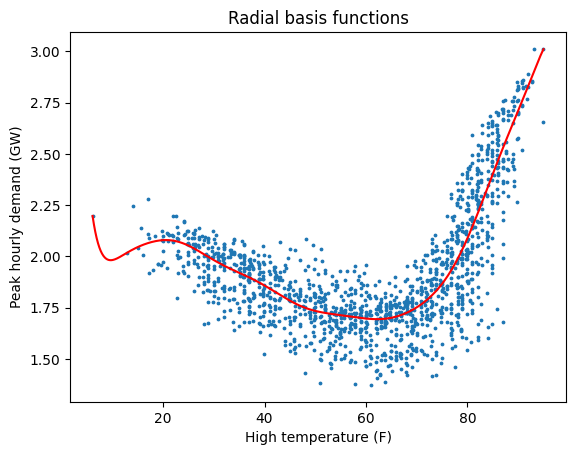

In [17]:
# gaussian kernel with regularisation
sigma = 20
def gaussian_kernel(x,y, sigma):
    r = np.abs(x - y)
    return np.exp(-(r ** 2)/ (2*sigma**2))

def guassian_kernel_matrix(x, y, sigma):
    kernel_matrix = np.zeros([len(x), len(y)])

    for i in range(len(x)):
        for j in range(len(y)):
            kernel_matrix[i,j] = gaussian_kernel(x[i], y[j], sigma)

    return kernel_matrix

# 1. calculate kernel
K = guassian_kernel_matrix(temp, temp, 20)

lambda_ = 0.00001
n = len(temp)
# K_inv = np.linalg.inv(K + lambda_ * np.eye(n))
theta_cp = cp.Variable(n)


# 2. Compute the regression coefficients
# 2. calculate regression coefficients
# first index: y-intercept, second index: gradient
objective =  cp.Minimize(cp.sum(cp.abs(demand - K @ theta_cp)) + cp.sum(0.0001*K@theta_cp))
# Define the problem and solve it
problem = cp.Problem(objective)
print("solving opt")
problem.solve(solver="GUROBI")#max_iters=10000)
print(theta_cp.value)

# 3. calculate test points
# k_test = len(test_points)

# predictions_new  = theta_cp.value @ test_point_map


# # 3. Prediction step
k_test = guassian_kernel_matrix(test_points, temp, sigma)
prediction_kerenl = k_test @ theta_cp.value


# 4. plot result 
plt.scatter(temp, demand, s=3)
plt.plot(test_points, prediction_kerenl, color = 'red')
plt.xlabel("High temperature (F)")
plt.ylabel("Peak hourly demand (GW)")
plt.title("Gaussian Kernel")
plt.show()

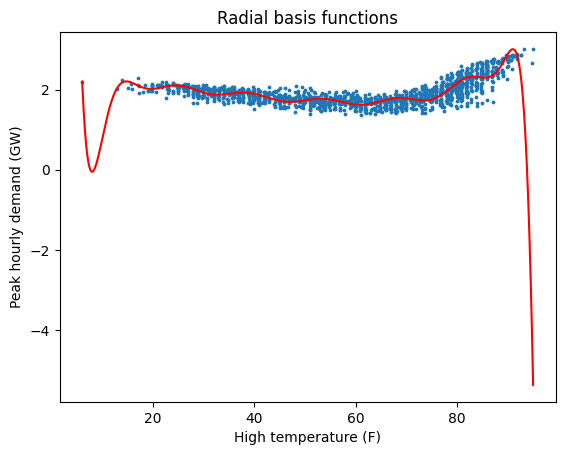

In [15]:
# # 3. Prediction step
k_test = guassian_kernel_matrix(test_points, temp, sigma)
prediction_kerenl = k_test @ theta_cp.value


# 4. plot result 
plt.scatter(temp, demand, s=3)
plt.plot(test_points, prediction_kerenl, color = 'red')
plt.xlabel("High temperature (F)")
plt.ylabel("Peak hourly demand (GW)")
plt.title("Radial basis functions")
plt.show()

In [27]:
import numpy as np
import cvxpy as cp
from sklearn.metrics.pairwise import rbf_kernel  # RBF (Gaussian) kernel

# Example data
np.random.seed(0)
n = 50
X = np.random.rand(n, 1) * 10  # Features
y = 3 * np.sin(X).flatten() + np.random.laplace(0, 1, n)  # Target with Laplace noise

# Query point where we want to estimate the regression
query_point = np.array([[5]])

# Kernel weights using RBF kernel
gamma = 0.1  # Parameter of RBF kernel
weights = rbf_kernel(X, query_point, gamma=gamma).flatten()
print(X)
# Setup the optimization problem
beta = cp.Variable(1)
b = cp.Variable(1)
loss = cp.norm1(cp.multiply(weights, X @ beta + b - y))  # Weighted absolute loss
reg = cp.norm1(beta) * 0.1  # L1 regularization
objective = cp.Minimize(loss + reg)
problem = cp.Problem(objective)

# Solve the problem
problem.solve()

# Output the results
print(f"Estimated regression function at x = {query_point.item()}: {beta.value[0]} * x + {b.value}")


[[5.48813504]
 [7.15189366]
 [6.02763376]
 [5.44883183]
 [4.23654799]
 [6.45894113]
 [4.37587211]
 [8.91773001]
 [9.63662761]
 [3.83441519]
 [7.91725038]
 [5.2889492 ]
 [5.68044561]
 [9.25596638]
 [0.71036058]
 [0.871293  ]
 [0.20218397]
 [8.32619846]
 [7.78156751]
 [8.70012148]
 [9.78618342]
 [7.99158564]
 [4.61479362]
 [7.80529176]
 [1.18274426]
 [6.39921021]
 [1.43353287]
 [9.44668917]
 [5.21848322]
 [4.1466194 ]
 [2.64555612]
 [7.74233689]
 [4.56150332]
 [5.68433949]
 [0.187898  ]
 [6.17635497]
 [6.12095723]
 [6.16933997]
 [9.43748079]
 [6.81820299]
 [3.59507901]
 [4.37031954]
 [6.97631196]
 [0.60225472]
 [6.66766715]
 [6.7063787 ]
 [2.10382561]
 [1.28926298]
 [3.15428351]
 [3.63710771]]
Estimated regression function at x = 5: 0.7712777859414114 * x + [-5.58923096]


/home/wde.woodside.com.au/w47147/projects/new_energy_data_utils/.venv/lib/python3.8/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


In [8]:
# question 2a
q2_data_df = pd.DataFrame(q2_data, columns=["power_consumption", "duration", "label"])



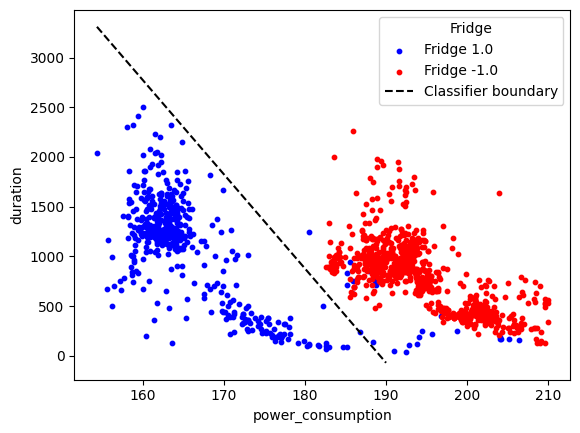

In [9]:
# two features from of the data plus a single constant term

k = len(q2_data)
phi = q2_data.T[0:2]
phi = np.array([np.ones(k), q2_data.T[0], q2_data.T[1]])

y = q2_data.T[2]

m = len(q2_data)
# 2. calculate regression coefficients
# first index: y-intercept, second index: gradient
# Setup the optimization variable
p = 3
theta = cp.Variable(p)
lambda_ = 0.0001

# Define the objective function (sum of absolute errors)
# objective = cp.Minimize(cp.norm(phi @ theta - demand, 1))
objective = cp.Minimize(cp.sum(cp.pos(1 - cp.multiply(y, phi.T @ theta))) + lambda_ * cp.norm(theta, 2)**2)

# for i in range(m):
#     objective +=  cp.Minimize(cp.sum(cp.log(1+cp.exp((-1)*y))

# problem = cp.Problem(objective)
# problem.solve()                             
# # Define the problem and solve it
problem = cp.Problem(objective)
problem.solve()


# # 3. decision boundary
x1_points = np.linspace(min(q2_data_df['power_consumption']), 190, 1000)
x_2  = -(theta.value[0]/theta.value[2]) - (theta.value[1]/theta.value[2])*x1_points

# # 4. plot result 
# Define a color map manually for the categories
color_map = {-1: 'red', 1: 'blue'}

# Plotting the scatter plot
fig, ax = plt.subplots()
for color_value in q2_data_df['label'].unique():
    subset = q2_data_df[q2_data_df['label'] == color_value]
    ax.scatter(subset['power_consumption'], subset['duration'], color=color_map[color_value], label=f'Fridge {color_value}', s=10)

ax.plot(x1_points, x_2, linestyle='--', color='black', label='Classifier boundary')
ax.set_xlabel('power_consumption')
ax.set_ylabel('duration')
ax.legend(title='Fridge')
plt.show()

In [13]:
# question 2b
# Calculate the pairwise squared Euclidean distances using np.linalg.norm
phi = np.array([q2_data.T[0], q2_data.T[1]/10])
sig = 20
sqdist = np.array([[np.linalg.norm(x_i - x_j)**2 for x_j in phi.T] for x_i in phi.T])

# Compute the Gaussian kernel matrix
K = np.exp(-sqdist / (2 * sig**2))
K = K + 0.01*np.eye(K.shape[0])
alpha = cp.Variable(K.shape[0])
# Define the objective function (sum of absolute errors)
# objective = cp.Minimize(cp.norm(phi @ theta - demand, 1))
# objective = cp.Minimize(cp.sum(cp.pos(1 - cp.multiply(y, K @ alpha))) + lambda_ * alpha.T @ K @ alpha)
# Constraints for the SVM dual problem
# constraints = [alpha >= 0, cp.sum(cp.multiply(alpha, y)) == 0]

# SVM dual objective
objective = cp.Minimize(cp.sum(cp.pos(1 - cp.multiply(y, K @ alpha))) + lambda_ * cp.quad_form(alpha, K))

# Define and solve the problem
problem = cp.Problem(objective)

# problem = cp.Problem(objective)
# problem.solve()                             
# # Define the problem and solve it
print("solving optimisation")
problem = cp.Problem(objective)
problem.solve(solver="GUROBI")


solving optimisation


ArpackNoConvergence: ARPACK error -1: ARPACK error -1: No convergence (13611 iterations, 0/1 eigenvectors converged)


        CVXPY note: This failure was encountered while trying to certify
        that a matrix is positive semi-definite (see [1] for a definition).
        In rare cases, this method fails for numerical reasons even when the matrix is
        positive semi-definite. If you know that you're in that situation, you can
        replace the matrix A by cvxpy.psd_wrap(A).

        [1] https://en.wikipedia.org/wiki/Definite_matrix
        

In [11]:
eigenvalues, eigenvectors = np.linalg.eig(K)

In [12]:
eigenvalues.min()

(9.999999999423851e-05-5.048893058539705e-15j)

In [2]:
# question 3
# temp is indepedent variable
data_folder = "hw6_data"
weather_columns = ["time_utc","temperature","dewpoint", "humidity", "pressure", "wind_speed", "condition"]
weather = pd.DataFrame(np.loadtxt(os.path.join(data_folder, "weather.txt")), columns=weather_columns)

# demand is dependent variable
demand = pd.DataFrame(np.loadtxt(os.path.join(data_folder, "demand.txt")),  columns =["time_utc", "demand"])


# question 3a: 
weather.replace(-9999, pd.NA, inplace=True)

# question 3b:
weather_interpolated = weather.interpolate(method='linear', axis=0)

# question 3c:
# join data frame
weather['timestamp'] = pd.to_datetime(weather['time_utc'], unit='s')
demand['timestamp'] = pd.to_datetime(demand['time_utc'], unit='s')
weather.set_index('timestamp', inplace=True)
demand.set_index('timestamp', inplace=True)
weather_ = weather.resample('D').max()
demand_ = demand.resample('D').max()
weather_demand = pd.merge(weather_, demand_, on='timestamp')

Text(0, 0.5, 'Peak daily demand')

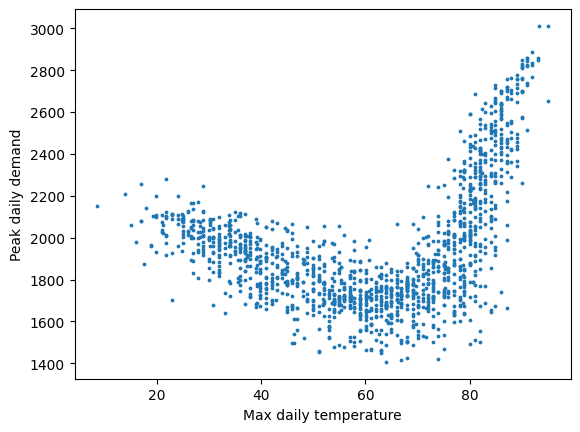

In [3]:
plt.scatter(weather_demand['temperature'], weather_demand['demand'], s=3)
plt.xlabel('Max daily temperature')
plt.ylabel('Peak daily demand')


In [12]:
def most_common_value(series):
    counts = series.value_counts()
    max_count = counts.max()
    most_common = counts[counts == max_count]
    return np.random.choice(most_common.index)


# 3d
# add minimums
weather_min = weather.resample('D').min()
weather_max_min_weather_demand = pd.merge(weather_demand, weather_min, on='timestamp', suffixes=('_max', '_min'))

# add averages
weather_average = weather.resample('D').mean()
weather_max_min_average_weather_demand = pd.merge(weather_max_min_weather_demand, weather_average, on='timestamp', suffixes=('', '_mean'))

# add most common 
weather_condition_mc = weather.resample('D')['condition'].apply(most_common_value)
weather_max_min_average_condition_mc_weather_demand = pd.merge(weather_max_min_average_weather_demand, weather_condition_mc, on='timestamp', suffixes=('', '_mc'))

# weather.resample('D')['condition'].apply(most_common_value)





In [14]:
weather_max_min_average_condition_mc_weather_demand.head()

,time_utc_x,temperature_max,dewpoint_max,humidity_max,pressure_max,wind_speed_max,condition_max,time_utc_y,demand,time_utc,temperature_min,dewpoint_min,humidity_min,pressure_min,wind_speed_min,condition_min,time_utc_mean,condition,condition_mc
timestamp,,,,,,,,,,,,,,,,,,,
2008-01-01,1.199231e+09,39.9,33.1,79.0,29.99,25.3,2.0,1.199228e+09,1888.417,1.199167e+09,28.0,19.0,57.0,29.72,4.6,0.0,1.199198e+09,1.250000,2.0
2008-01-02,1.199318e+09,26.6,19.9,86.0,30.52,23.0,6.0,1.199315e+09,2051.433,1.199233e+09,19.0,1.9,37.0,29.94,8.1,2.0,1.199270e+09,2.583333,2.0
2008-01-03,1.199404e+09,19.9,10.9,86.0,30.80,15.0,6.0,1.199401e+09,2109.081,1.199321e+09,12.2,3.9,54.0,30.53,0.0,0.0,1.199362e+09,3.400000,2.0
2008-01-04,1.199491e+09,35.1,10.0,77.0,30.72,13.8,6.0,1.199488e+09,2125.197,1.199408e+09,12.9,7.0,33.0,30.45,4.6,0.0,1.199449e+09,4.500000,6.0
2008-01-05,1.199577e+09,39.2,36.0,93.0,30.44,13.8,7.0,1.199574e+09,2004.797,1.199494e+09,28.0,9.0,36.0,30.15,0.0,0.0,1.199538e+09,1.961538,0.0


In [19]:
# simple linear regression 

# 1. calculate feature map
# here feature map is simply the 1 vector combined with data vector
# phi is the feature map;
demand = weather_max_min_average_condition_mc_weather_demand['demand'].tolist()
temp = weather_max_min_average_condition_mc_weather_demand['temperature_max'].tolist()
k = len(temp)
phi = np.array([np.ones(k), temp]).T
print(phi)
# 2. calculate regression coefficients
# first index: y-intercept, second index: gradient
p = 2
theta = cp.Variable(p)

# Define the objective function (sum of absolute errors)
# objective = cp.Minimize(cp.norm(phi @ theta - demand, 1))
objective =  cp.Minimize(cp.sum_squares(demand - phi @ theta))
# Define the problem and solve it
problem = cp.Problem(objective)
problem.solve()
print(f"base objective value: {problem.value}")

[[ 1.  39.9]
 [ 1.  26.6]
 [ 1.  19.9]
 ...
 [ 1.  39.9]
 [ 1.  51.8]
 [ 1.  51.1]]
base objective value: 110524534.89939538


In [20]:
base_objective = 110524534.89939538

In [24]:
# simple linear regression 

# 1. calculate feature map
# here feature map is simply the 1 vector combined with data vector
# phi is the feature map;
demand = weather_max_min_average_condition_mc_weather_demand['demand'].tolist()
temp = weather_max_min_average_condition_mc_weather_demand['temperature_max'].tolist()
wind = weather_max_min_average_condition_mc_weather_demand['wind_speed_min'].tolist()
humidity = weather_max_min_average_condition_mc_weather_demand['humidity_min'].tolist()
dewpoint = weather_max_min_average_condition_mc_weather_demand['dewpoint_min'].tolist()
pressure =  weather_max_min_average_condition_mc_weather_demand['pressure_min'].tolist()
mc = weather_max_min_average_condition_mc_weather_demand['condition'].tolist()


k = len(temp)
phi = np.array([np.ones(k), temp, wind, humidity, dewpoint, pressure, mc]).T
print(phi)
# 2. calculate regression coefficients
# first index: y-intercept, second index: gradient
p = phi.shape[1]
theta = cp.Variable(p)

# Define the objective function (sum of absolute errors)
# objective = cp.Minimize(cp.norm(phi @ theta - demand, 1))
objective =  cp.Minimize(cp.sum_squares(demand - phi @ theta))
# Define the problem and solve it
problem = cp.Problem(objective)
problem.solve()
print(f"Adding maximum wind gives new objective objective value: {problem.value} decrease of {problem.value - base_objective} from base objective.")

[[ 1.         39.9         4.6        ... 19.         29.72
   1.25      ]
 [ 1.         26.6         8.1        ...  1.9        29.94
   2.58333333]
 [ 1.         19.9         0.         ...  3.9        30.53
   3.4       ]
 ...
 [ 1.         39.9         0.         ... 14.         29.76
   2.36666667]
 [ 1.         51.8         3.5        ... 26.1        29.72
   2.        ]
 [ 1.         51.1         4.6        ... 37.         29.73
   0.42857143]]
Adding maximum wind gives new objective objective value: 96264769.4347075 decrease of -14259765.464687884 from base objective.


In [ ]:
# simple linear regression 

# 1. calculate feature map
# here feature map is simply the 1 vector combined with data vector
# phi is the feature map;
demand = weather_max_min_average_condition_mc_weather_demand['demand'].tolist()
temp = weather_max_min_average_condition_mc_weather_demand['temperature_max'].tolist()
wind = weather_max_min_average_condition_mc_weather_demand['wind_speed_max'].tolist()
k = len(temp)
phi = np.array([np.ones(k), temp, wind]).T
print(phi)
# 2. calculate regression coefficients
# first index: y-intercept, second index: gradient
p = phi.shape[1]
theta = cp.Variable(p)

# Define the objective function (sum of absolute errors)
# objective = cp.Minimize(cp.norm(phi @ theta - demand, 1))
objective =  cp.Minimize(cp.sum_squares(demand - phi @ theta))
# Define the problem and solve it
problem = cp.Problem(objective)
problem.solve()
print(f"Adding maximum wind gives new objective objective value: {problem.value} decrease of {problem.value - base_objective} from base objective.")